# Load Package

In [1]:
#待續
# ES 加上cross entropy試試看
#

In [2]:
#https://github.com/YuTaNCCU/201902_ANN_Metaheuristic/tree/master/ES
import random
import pandas as pd
from string import ascii_lowercase
from copy import deepcopy
from abc import ABCMeta, abstractmethod
from copy import deepcopy
from collections import deque
from numpy import argmax
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential 
from keras.callbacks import TensorBoard,EarlyStopping
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss
import  seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Load Data

In [3]:
url = 'https://raw.githubusercontent.com/YuTaNCCU/201902_ANN_Metaheuristic/master/Data/red.csv'
red = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/YuTaNCCU/201902_ANN_Metaheuristic/master/Data/white.csv'
white = pd.read_csv(url)

red['WineCatg']='red'
white['WineCatg']='white'
Wine_Data = pd.concat([red, white])

display(
    red.shape,
  white.shape,
  Wine_Data.shape,
  Wine_Data.head(5),
  Wine_Data.tail(5)
)

(1599, 13)

(4898, 13)

(6497, 13)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineCatg
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineCatg
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [4]:
Wine_Data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'WineCatg'],
      dtype='object')

In [5]:
from sklearn import preprocessing
Wine_Data_preprocessed = Wine_Data.drop(['WineCatg'], axis=1)
scaler = preprocessing.StandardScaler() 
col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',  'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Wine_Data_preprocessed[col] = scaler.fit_transform(Wine_Data_preprocessed[col])
Wine_Data_preprocessed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,5
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862605,0.701486,-0.115073,0.999579,-0.580068,5
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092603,0.768188,0.258120,0.797958,-0.580068,5
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986450,1.101694,-0.363868,0.327510,-0.580068,6
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,5


In [6]:
print( '原本各種quality記數: \n', Wine_Data.quality.value_counts().sort_index() )
Wine_Data_Y01 = Wine_Data_preprocessed.replace({'quality':[3,4,5,6,7,8,9]},{'quality':[0,0,0,1,1,1,1]})
print( '分類成好壞兩種quality記數: \n', Wine_Data_Y01.quality.value_counts().sort_index() )
Wine_Data_Y01.head(5)

原本各種quality記數: 
 3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64
分類成好壞兩種quality記數: 
 0    2384
1    4113
Name: quality, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,0
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862605,0.701486,-0.115073,0.999579,-0.580068,0
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092603,0.768188,0.258120,0.797958,-0.580068,0
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986450,1.101694,-0.363868,0.327510,-0.580068,1
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,0


In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X=Wine_Data_Y01.drop(['quality'], axis=1)
y=Wine_Data_Y01['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state= 123)

display(
      X_train.shape,
      X_val.shape,
      X_test.shape,
      y_train.shape,
      y_val.shape,
      y_test.shape,
)

(4157, 11)

(1040, 11)

(1300, 11)

(4157,)

(1040,)

(1300,)

# Define Performance

In [8]:
def Performance(model):
    #######################
    ## Confusion Matrix  ##
    #######################

    # Predicting the Test set results
    y_score = model.predict(X_test) #X_train X_test
    y_pred = (y_score > 0.5)  #y_pred 有 NA

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred) #y_train y_test
    #######################
    ###    accuracy      ##
    #######################
    print("Our accuracy is {}%".format(round(((cm[0][0] + cm[1][1])/sum(sum(cm)))*100,2)))

    sns.heatmap(cm,annot=True)
    #######################
    ###       AUC        ##
    #######################    
    from sklearn.metrics import roc_auc_score
    print("Our AUC is {}%".format(round((roc_auc_score(y_test, y_score)*100),2)))
    
    #######################
    ###    ROC curve     ##
    #######################
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle

    from sklearn import svm, datasets
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import label_binarize
    from sklearn.multiclass import OneVsRestClassifier
    from scipy import interp
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes =2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    #Plot of a ROC curve for a specific class
    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show() 

# Define Keras Model

In [9]:
def SummarizeHistory(modelcallbacks, prfix='', UseValid=False) :
    
    plt.figure()
    plt.plot(modelcallbacks.history[prfix+'loss'])  #loss mean_absolute_error 
    if UseValid==True:
        plt.plot(modelcallbacks.history['val_'+prfix+'loss'])  #val_loss 
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()

    plt.figure()
    plt.plot(modelcallbacks.history[prfix+'acc'])  #loss mean_absolute_error 
    if UseValid==True:
        plt.plot(modelcallbacks.history['val_'+prfix+'acc'])  # val_mean_absolute_error
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
    plt.show()
    
def ModelCompile():
    from keras import backend as K
    from keras.layers import Dense
    from keras.models import Sequential, Model as keras_models_Model

    K.clear_session() 
    gpu_options = tf.GPUOptions(allow_growth=True)
    sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
    tf.keras.backend.set_session(sess)

    model = Sequential()
    model.add(Dense(round(X_train.shape[1]/2), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(round(X_train.shape[1]/2), activation='relu'))
    model.add(Dense(round(X_train.shape[1]/4), activation='relu', name = 'IntermediateLayer'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def ModelFit(model, weights, epochs):
    #class_weight = {0: 1., 1: 1525/2632}
    model.set_weights(weights)
    modelcallbacks = model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1,
        validation_data = (X_val, y_val),
        callbacks=[EarlyStopping(monitor='val_loss', patience=3, verbose=2, restore_best_weights=True)],
        shuffle=True) #, class_weight=class_weight
    SummarizeHistory(modelcallbacks, UseValid=True)                                        
    weights = model.get_weights() 
    return model, weights

# Define ES Class 

In [43]:
class ES:
    """
    Conducts tabu search
    """
    __metaclass__ = ABCMeta

    #default hyper parameters
    InitialSigma = None
    ParentsSize = None
    ChildSize = None
    tao = None
    
    #for input/output
    KerasModels = None
    WeightsStrucure = None   
    weights = None
    
    #for record
    cur_steps = 1
    best_weight = None
    best_score = None
    best_Loss = None
    
    UseOLSReg=None
    X_train=None
    y_train=None
    
    def __init__(self, KerasModels, X_train, y_train, UseOLSReg=False, InitialSigma = 0.1, ParentsSize = 15, ChildSize = 100, tao = 0.5):
        """
        :param KerasModels: a Keras model, like keras.engine.sequential.Sequential
        :param weights: initial weights, should be a Keras model weight
        :param max_steps: maximum number of steps to run algorithm for
        :param UseOLSReg: If True, than use "OLS Regression" for the last layer
        
        """
        self.KerasModels = KerasModels
        
        self.UseOLSReg = UseOLSReg
        
        self.X_train=X_train
        self.y_train=y_train
 
        if all(isinstance(x, float) for x in [InitialSigma, tao]) and all(x > 0 for x in [InitialSigma, tao]):
            self.InitialSigma = InitialSigma
            self.tao = tao
        else:
            raise TypeError('InitialSigma & tao must be a positive float')
            
        if all(isinstance(x, int) for x in [ParentsSize, ChildSize]) and all(x > 0 for x in [ParentsSize, ChildSize]):
            self.ParentsSize = ParentsSize
            self.ChildSize = ChildSize
        else:
            raise TypeError('ParentsSize, ChildSize & max_steps must be a positive integer')

    def __str__(self): 
        return ('ES STEPS: %d ' +
                ' - BEST Accuracy: %.4f '+
                ' - BEST Score(Log Loss): %.4f ') % \
               (self.cur_steps, self.best_Loss, self.best_score)

    def __repr__(self):
        return self.__str__() 
    
    def _FlattenWeights(self, weights):
        """
        flatten weights
        
        param weights: keras神經網路的權重格式:nparray包在list中
        return WeightsStrucure : 神經網路各層的權重shape包在list中，unflatten時會用到
        return FlattenedWeights : 一維list包含所有的權重
        """
        WeightsStrucure = []
        FlattenedWeights = []
        for i_layer in weights:
            WeightsStrucure.append(i_layer.shape)
            if len(i_layer.shape) == 1 :# 該層權重的shape為一維 e.g. (15,)      
                FlattenedWeights.extend(i_layer)
            else :# 該層權重的shape為二維 e.g. (30, 15)  
                for i_links in i_layer:
                    FlattenedWeights.extend(i_links)
        return WeightsStrucure, FlattenedWeights

    def _UnflattenWeights(self, WeightsStrucure, ModifiedWeights):
        """
        Unflatten(回復成原本的結構) weights  
        
        param WeightsStrucure : 神經網路各層的權重shape包在list中
        param ModifiedWeights : 一維list包含所有meteHeuristic修改過的權重
        return: keras神經網路的權重格式:nparray包在list中
        """
        UnflattenWeights = []
        i_index = 0 
        for i_layer in WeightsStrucure:
            if len(i_layer) == 1 : # 該層權重的shape為一維 e.g. (15,)      
                TempList = ModifiedWeights[i_index:(i_index + i_layer[0])]
                TempList = np.asarray(TempList)
                i_index = i_index + i_layer[0]
            else : # 該層權重的shape為二維 e.g. (30, 15)  
                TempList = ModifiedWeights[i_index:(i_index + (i_layer[0]*i_layer[1]))]
                TempList = np.reshape(TempList, i_layer )
                i_index = i_index + (i_layer[0]*i_layer[1])
            UnflattenWeights.append(TempList)
        return UnflattenWeights   
    
    def _best(self, Population_Child_score):
        """
        Finds the best member of a neighborhood
        :param Population_Child_score: a np array
        :return: the indtex of N best member, N = ParentsSize
        """
        return np.array( Population_Child_score ).argsort()#[::-1]
    
    def _Recombination(self, Population_Parents_Weights, Population_Parents_Sigma, rows): #GenerateParents
        """
        Generate New Parents Polulation
        """
        Population_Weights_Recombination = np.zeros(shape = (rows, Population_Parents_Weights.shape[1]))
        Population_Sigma_Recombination = np.zeros(shape = (rows, Population_Parents_Weights.shape[1]))
        for index_row, _ in enumerate( Population_Weights_Recombination ):
            """
            可能可以平行計算
            """
            TwoRowschoiced = np.random.choice(Population_Parents_Weights.shape[0], size=2, replace=False,)
            Parent1Mask = np.random.randint(2, size=Population_Parents_Weights.shape[1])
            Parent2Mask = np.full(shape = Population_Parents_Weights.shape[1], fill_value = 1 )  - Parent1Mask
            
            Population_Weights_Recombination[index_row,:] = (Population_Parents_Weights[TwoRowschoiced] * [Parent1Mask, Parent2Mask]).sum(axis=0)
            Population_Sigma_Recombination[index_row,:] = Population_Parents_Sigma[TwoRowschoiced].mean(axis=0)
        return Population_Weights_Recombination, Population_Sigma_Recombination

    def _score(self, ModifiedWeights):
        
        """
        Returns objective function value of a state

        :param state: a state
        :return: objective function value of state
        """
        UnflattenedWeights = self._UnflattenWeights(WeightsStrucure = self.WeightsStrucure, ModifiedWeights = ModifiedWeights)
        self.KerasModels.set_weights(UnflattenedWeights)
        test_on_batch = self.KerasModels.evaluate(self.X_train, self.y_train) # return ['loss', 'acc']
        #return test_on_batch[0], test_on_batch[1] #0:loss, 1:acc
        return  test_on_batch[1], test_on_batch[0]
    
    def _OLSReg(self, ModifiedWeights):
        
        """
        :param : 
        :return: Keras Models, objective function value of state
        """
        UnflattenedWeights = self._UnflattenWeights(WeightsStrucure = self.WeightsStrucure, ModifiedWeights = ModifiedWeights)
        
        #%% OLS Regression
        #obtain the output of an intermediate layer
        #https://keras.io/getting-started/faq/?fbclid=IwAR3Zv35V-vmEy85anudOrlxCExXYwyG6cRL1UR0AaLPU6sZEoBjsbX-8LXQ#how-can-i-obtain-the-output-of-an-intermediate-layer
        self.KerasModels.set_weights(UnflattenedWeights)
        layer_name = 'IntermediateLayer'
        intermediate_layer_model = keras_models_Model(inputs=self.KerasModels.input,
                                         outputs=self.KerasModels.get_layer(layer_name).output)
        intermediate_output = intermediate_layer_model.predict(self.X_train)

        #fit LM
        lm =  LogisticRegression(random_state=0, solver='liblinear').fit(intermediate_output, self.y_train)
        
        #lm =  LinearRegression().fit(intermediate_output, self.y_train)
        # 印出係數, 截距 print(lm.coef_, lm.intercept_)
        
        #score
        #score = log_loss(y_pred = lm.predict(intermediate_output), y_true= self.y_train)
        
        #get OutLayerWeights
        OutLayerWeights = [np.array(lm.coef_).reshape(self.WeightsStrucure[-2]),
                           np.array(lm.intercept_).reshape(self.WeightsStrucure[-1])]

        #update ES-optimized weights
        UnflattenedWeights[-2:] = OutLayerWeights        
        
        #self.KerasModels.set_weights(UnflattenedWeights)
        #test_on_batch = self.KerasModels.test_on_batch(self.X_train, self.y_train, sample_weight=None) # return ['loss', 'acc']
        
        #print( 'score',score, 'test_on_batch',test_on_batch)
        _, OLS_Optimized_Weight = self._FlattenWeights(UnflattenedWeights)
        return OLS_Optimized_Weight 

    def run(self, weights, max_steps=5, verbose=10, useOLSReg = False, Population_Parents_Weights=None, Population_Parents_Sigma=None):
        """
        Conducts ES
        :param weights: 
        :param Population_Parents_Weights: 如果想要重複使用Parents Population，則由此傳入Weights
        :param Population_Parents_Sigma: 如果想要重複使用Parents Population，則由此傳入Sigma
        :param max_steps: 
        :param verbose: int which indicates how many iter to show score
        :return: Keras Models, best state and objective function value of best state
        """
        
        if isinstance(weights, list)  :
          
            self.WeightsStrucure, self.weights = self._FlattenWeights(weights)
            self.best_weight = self.weights
            self.best_Loss, self.best_score = self._score(self.best_weight)
           
        else:
            raise TypeError('initial_state must be a list') 
            
        self.max_steps = max_steps
        
        #Step1 initial
        if (Population_Parents_Weights is None) & (Population_Parents_Sigma is None):
            Population_Parents_Weights = np.array([self.weights, self.weights])         
            Population_Parents_Sigma = np.full(shape = (self.ParentsSize, len(self.weights)), fill_value = self.InitialSigma ) 
            Population_Parents_Weights, _ = self._Recombination(Population_Parents_Weights, Population_Parents_Sigma, rows = self.ParentsSize )
        else: #接續上一個phase的10%最好的個體
            Population_Parents_Weights = Population_Parents_Weights
            Population_Parents_Sigma = Population_Parents_Sigma
            
        self.cur_steps = 1
        while True:   
            #Step2 Child
            ##Discrete Recombination
            Population_Child_Weights, Population_Child_Sigma = self._Recombination(Population_Parents_Weights, Population_Parents_Sigma, rows = self.ChildSize )
            ##mutation1
            RamdonNormalValue = np.random.normal(0, 1, 1)
            RamdonNormalValueDifferent = np.random.normal(0, 1, Population_Child_Sigma.shape)
            Population_Child_Sigma = np.exp( (1-self.tao)*RamdonNormalValue + self.tao*RamdonNormalValueDifferent )
            ##mutation2
            Population_Child_Weights = Population_Child_Weights + np.random.normal(0, Population_Child_Sigma, Population_Child_Sigma.shape)
            
            
            # OLS Regression
            if useOLSReg == True:
              for i, i_Child in enumerate(Population_Child_Weights) :
                  OLS_Optimized_Weight = self._OLSReg(i_Child)
                  #print(OLS_Optimized_Weight,'i:\n', i, Population_Child_Weights[i])
                  Population_Child_Weights[i] = OLS_Optimized_Weight
            
            
            #step3 Evaluation
            Population_Child_score = []
            for i_Child in Population_Child_Weights :
                """
                可能可以平行計算
                """
                _, tempScore = self._score(i_Child)
                Population_Child_score.append( tempScore )
            
            #選出最好的ParentsSize個個體做為下一代的親代
            BestIndex = self._best(Population_Child_score)
            BestNIndex = BestIndex[:self.ParentsSize] 
            Population_Parents_Weights = Population_Child_Weights[BestNIndex,:]
            Population_Parents_Sigma = Population_Child_Sigma[BestNIndex,:]
            #選出最好的10%個體做為下一phase的親代
            Best_10Percent_Index = BestIndex[:round(self.ChildSize*0.1)] #Multiphase
            Population_Best_10PercentChild_Weights = Population_Child_Weights[Best_10Percent_Index,:]
            Population_Best_10PercentChild_Sigma = Population_Child_Sigma[Best_10Percent_Index,:] 
            
            #更新best
            best_weight_This_Iter =  Population_Child_Weights[BestNIndex,:][0]
            _, best_score_This_Iter = self._score(Population_Child_Weights[BestNIndex,:][0])
            if best_score_This_Iter < self.best_score:
                self.best_weight =  Population_Child_Weights[BestNIndex,:][0]
                self.best_Loss, self.best_score = self._score(Population_Child_Weights[BestNIndex,:][0])
        
            #print process 
            if ((self.cur_steps ) % verbose == 0) and verbose:
               print(self)
                
            self.cur_steps = self.cur_steps + 1
            #step4 check stop criteria
            if self.cur_steps > max_steps:
                print( 'Stop: Reach max_steps' )
                break
        return self._UnflattenWeights(WeightsStrucure = self.WeightsStrucure, ModifiedWeights = self.best_weight), self.best_score, Population_Best_10PercentChild_Weights, Population_Best_10PercentChild_Sigma

# Main

## 只用BP

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 4157 samples, validate on 1040 samples
Epoch 1/150
4157/4157 [==============================] - 1s 218us/step - loss: 0.6737 - acc: 0.6327 - val_lo

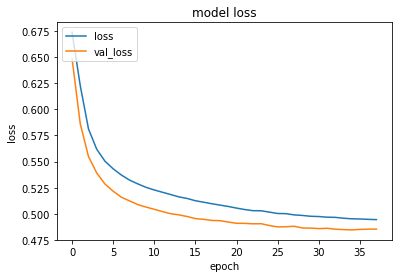

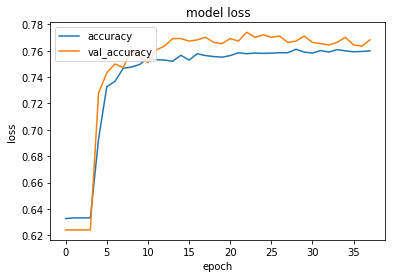

Our accuracy is 76.38%
Our AUC is 81.66%


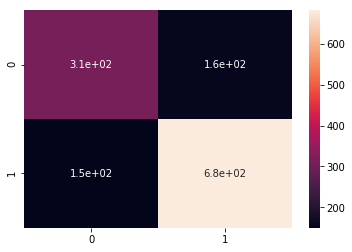

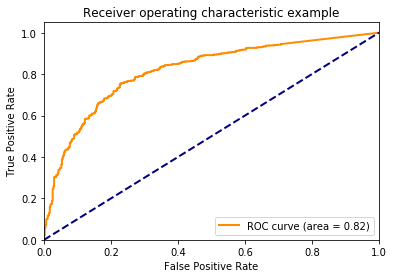

In [12]:
#只用NN
model = ModelCompile()
weights = model.get_weights() 
model, weights = ModelFit(model=model, weights=weights, epochs=150)
Performance(model)

## 只用ES

In [34]:
y_score = model.predict(X_test)
y_score

array([[0.63165516],
       [0.63165516],
       [0.63165516],
       ...,
       [0.63165516],
       [0.63165516],
       [0.63165516]], dtype=float32)

In [ ]:
# Initialize
model = ModelCompile()
weights = model.get_weights() 
MyES = ES(model, X_train, y_train, InitialSigma = 0.1, ParentsSize = 15, ChildSize = 100, tao = 0.5)   
weights, ES_Optimized_ObjVal, _, _  = MyES.run(weights, useOLSReg =False, max_steps=3, verbose = 1)

# Optimize
GlobalBestAccuracy = 0
NoImproveTimes = 0
while True:
  # Gradient-based Optimize
  #model, weights = ModelFit(model=model, weights=weights, epochs=50)

  # ES
  weights, ES_Optimized_ObjVal, _, _ = MyES.run(weights, max_steps=20, verbose = 1)
    
  # Stop Criteria
  if ES_Optimized_ObjVal < GlobalBestAccuracy:
    GlobalBestAccuracy = ES_Optimized_ObjVal
    NoImproveTimes = 0
  else: 
    NoImproveTimes = NoImproveTimes + 1
    if NoImproveTimes == 2:
      break
    
Performance(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
4157/4157 [==============================] - 0s 23us/step
ES STEPS: 1  - BEST Accuracy: 0.6269  - BEST Score(Log Loss): 0.6641 
4157/4157 [==============================] - 0s 21us/step
ES STEPS: 2  - BEST Accuracy: 0.6269  - BEST Score(Log Loss): 0.6641 
4157/4157 [=========

## 版本1：ParentsSize = 15, ChildSize = 100

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
[0.09019393, 0.25315857]
ES STEPS: 1  - BEST Accuracy: 0.6331  - BEST Score(Log Loss): 0.6517 
ES STEPS: 2  - BEST Accuracy: 0.6331  - BEST Score(Log Loss): 0.6517 
ES STEPS: 3  - BEST Accuracy: 0.6331  - BEST Score(Log Loss): 0.6517 
Stop: Reach max_steps
Train on 4157 sampl

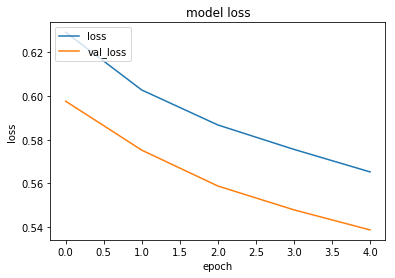

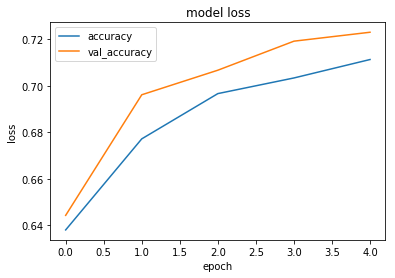

BPweights: [array([[ 0.35586345,  1.1607246 ,  0.16595002, -0.60393375, -0.02733747,
        -0.25978038],
       [ 1.0725944 , -0.464141  , -0.24241653, -0.40978196,  0.45032483,
         0.679514  ],
       [-0.1367602 ,  0.26806575, -0.25167966, -0.07969575,  0.91936475,
         0.18623962],
       [-0.14457487,  0.10061742,  0.13243909, -0.31485003,  0.26999083,
         0.2960171 ],
       [-0.5087412 , -0.39073035, -0.55379695, -0.6644913 ,  0.29982993,
        -0.8949302 ],
       [-0.17875093,  0.6268319 ,  0.3775853 ,  0.6246748 ,  0.8690635 ,
        -0.09229161],
       [ 0.3651212 ,  0.0761411 , -0.18236102, -0.41339567, -0.21697348,
        -0.23644811],
       [ 0.5832504 ,  0.25669706,  0.5230968 ,  0.23091094, -0.28700554,
        -2.5379715 ],
       [ 0.02646867,  0.89128083,  0.42201084, -0.7053879 ,  0.39940795,
         0.5242549 ],
       [-0.92368954, -0.7880524 ,  0.00443626,  0.8752596 , -0.5719962 ,
         1.0093312 ],
       [-0.7889128 ,  0.8152956 ,  0.1

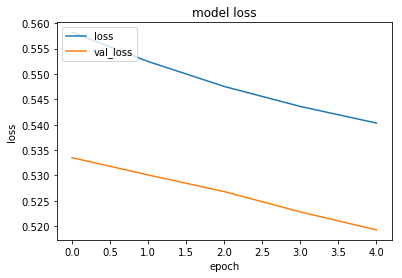

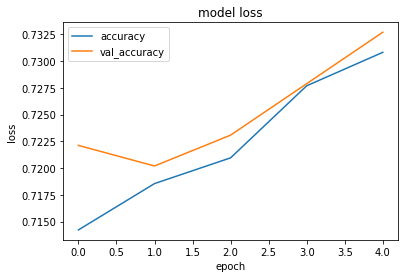

BPweights: [array([[ 3.0192801e-01,  1.1131790e+00,  1.9498202e-01, -6.4639217e-01,
        -7.2615705e-02, -2.2492547e-01],
       [ 1.0910385e+00, -5.1895630e-01, -2.6560819e-01, -3.9383304e-01,
         4.6137646e-01,  6.9501472e-01],
       [-2.2649551e-02,  1.5444288e-01, -2.3809583e-01, -7.9838648e-02,
         9.2842203e-01,  1.3742724e-01],
       [-3.4461135e-01,  2.3574160e-01,  9.8226480e-02, -3.0553925e-01,
         2.8310212e-01,  4.9091631e-01],
       [-3.7421560e-01, -4.7400409e-01, -5.9312594e-01, -6.0656434e-01,
         3.0588356e-01, -8.6131293e-01],
       [-2.2543231e-01,  6.2127668e-01,  4.1845870e-01,  5.9625608e-01,
         8.8294327e-01, -7.5474358e-04],
       [ 4.4700310e-01,  3.4209747e-02, -1.0464216e-01, -4.9550116e-01,
        -1.9109450e-01, -2.8160980e-01],
       [ 4.5238355e-01,  1.8244378e-01,  4.7030249e-01,  1.8550259e-01,
        -3.1021982e-01, -2.5090942e+00],
       [ 3.0552916e-02,  8.1961465e-01,  4.0481725e-01, -6.7477679e-01,
         3.4

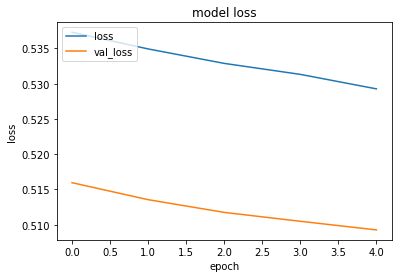

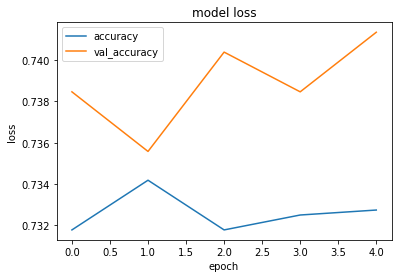

BPweights: [array([[ 0.2574113 ,  1.0540551 ,  0.18768422, -0.6906512 , -0.14853421,
        -0.20632307],
       [ 1.1104708 , -0.53082305, -0.23033679, -0.4220395 ,  0.4819442 ,
         0.7485487 ],
       [ 0.0515772 ,  0.07739599, -0.22548966, -0.03180796,  0.90329236,
         0.10066523],
       [-0.44309953,  0.2976761 ,  0.08575504, -0.28404054,  0.2363975 ,
         0.58909327],
       [-0.3387922 , -0.48268095, -0.5985768 , -0.56572104,  0.28297827,
        -0.80627716],
       [-0.25115377,  0.5984743 ,  0.45566916,  0.60485613,  0.9439553 ,
         0.01845036],
       [ 0.46159014,  0.01509592, -0.05775661, -0.5638124 , -0.11257003,
        -0.32984385],
       [ 0.3418023 ,  0.15742876,  0.4379834 ,  0.15228552, -0.35943422,
        -2.4877555 ],
       [ 0.06204945,  0.8115324 ,  0.40919098, -0.62968713,  0.35338107,
         0.5740204 ],
       [-0.8801078 , -0.66319716, -0.08959956,  0.7867505 , -0.63907   ,
         0.99047583],
       [-0.8392767 ,  1.0956405 ,  0.1

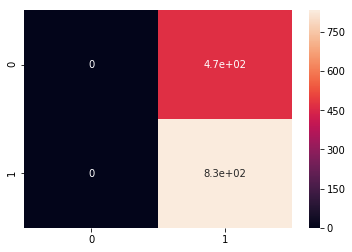

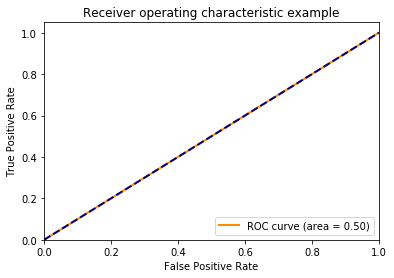

In [39]:
# Initialize
model = ModelCompile()
weights = model.get_weights() 
MyES = ES(model, X_train, y_train, InitialSigma = 0.1, ParentsSize = 15, ChildSize = 100, tao = 0.5)   
weights, ES_Optimized_ObjVal, _, _  = MyES.run(weights, useOLSReg =False, max_steps=3, verbose = 1)

# Optimize
GlobalBestAccuracy = 0
NoImproveTimes = 0
while True:
  # Gradient-based Optimize
  model, weights = ModelFit(model=model, weights=weights, epochs=50)
  print('BPweights:',weights[:2])  
  # ES
  weights, ES_Optimized_ObjVal, _, _ = MyES.run(weights, max_steps=20, verbose = 1)
    
  # Stop Criteria
  if ES_Optimized_ObjVal > GlobalBestAccuracy:
    GlobalBestAccuracy = ES_Optimized_ObjVal
    NoImproveTimes = 0
  else: 
    NoImproveTimes = NoImproveTimes + 1
    if NoImproveTimes == 2:
      break
    
Performance(model)

## 版本2：ParentsSize = #param x2, ChildSize = ParentsSize*

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
ES STEPS: 1  - BEST Loss: 3.4758  - BEST SCORE: 0.6897 
ES STEPS: 2  - BEST Loss: 0.6382  - BEST SCORE: 0.6930 
ES STEPS: 3  - BEST Loss: 0.6382  - BEST SCORE: 0.6930 
Stop: Reach max_steps
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [================

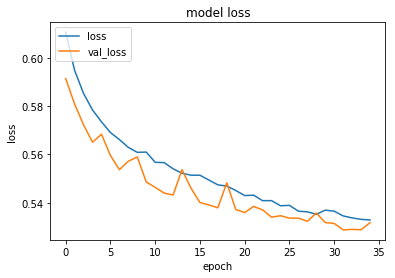

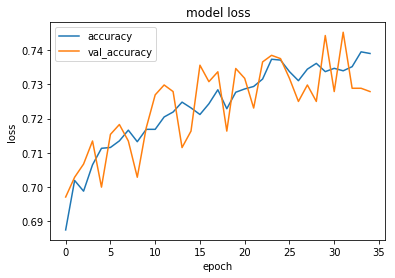

ES STEPS: 1  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 2  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 3  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 4  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 5  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 6  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 7  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 8  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 9  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 10  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 11  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 12  - BEST Loss: 0.5335  - BEST SCORE: 0.7356 
ES STEPS: 13  - BEST Loss: 4.1669  - BEST SCORE: 0.7368 
ES STEPS: 14  - BEST Loss: 4.1977  - BEST SCORE: 0.7373 
ES STEPS: 15  - BEST Loss: 3.8162  - BEST SCORE: 0.7424 
ES STEPS: 16  - BEST Loss: 4.0192  - BEST SCORE: 0.7477 
ES STEPS: 17  - BEST Loss: 4.0192  - BEST SCORE: 0.7477 
ES STEPS: 18  - BEST Loss: 4.0192  - BES

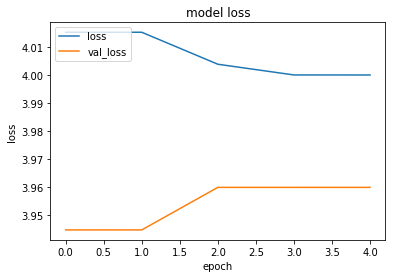

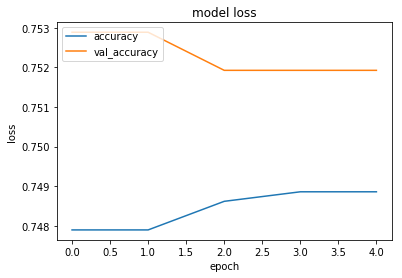

ES STEPS: 1  - BEST Loss: 3.9088  - BEST SCORE: 0.7525 
ES STEPS: 2  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 3  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 4  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 5  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 6  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 7  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 8  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 9  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 10  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 11  - BEST Loss: 3.9143  - BEST SCORE: 0.7554 
ES STEPS: 12  - BEST Loss: 3.8110  - BEST SCORE: 0.7558 
ES STEPS: 13  - BEST Loss: 3.8110  - BEST SCORE: 0.7558 
ES STEPS: 14  - BEST Loss: 3.8110  - BEST SCORE: 0.7558 
ES STEPS: 15  - BEST Loss: 3.8110  - BEST SCORE: 0.7558 
ES STEPS: 16  - BEST Loss: 3.8110  - BEST SCORE: 0.7558 
ES STEPS: 17  - BEST Loss: 3.8110  - BEST SCORE: 0.7558 
ES STEPS: 18  - BEST Loss: 3.8110  - BES

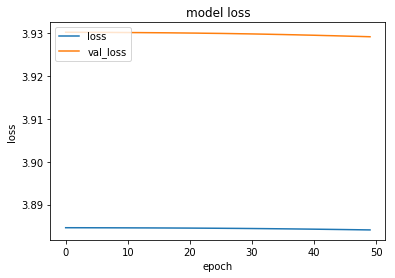

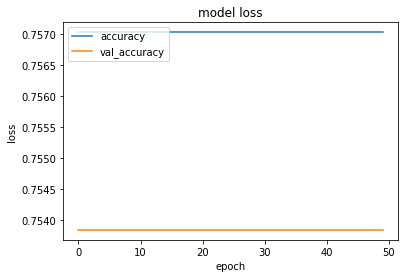

ES STEPS: 1  - BEST Loss: 3.8841  - BEST SCORE: 0.7570 
ES STEPS: 2  - BEST Loss: 3.8841  - BEST SCORE: 0.7570 
ES STEPS: 3  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 4  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 5  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 6  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 7  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 8  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 9  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 10  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 11  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 12  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 13  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 14  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 15  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 16  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 17  - BEST Loss: 3.8623  - BEST SCORE: 0.7587 
ES STEPS: 18  - BEST Loss: 3.8623  - BES

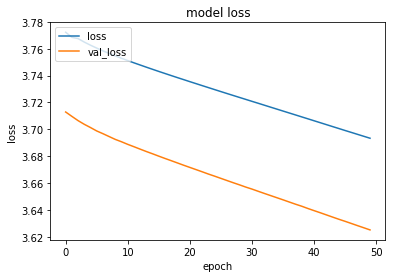

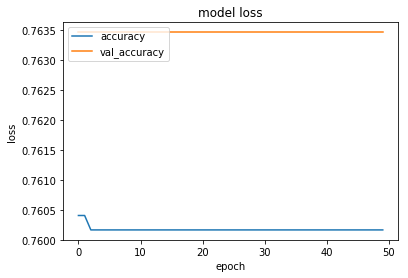

ES STEPS: 1  - BEST Loss: 3.6108  - BEST SCORE: 0.7631 
ES STEPS: 2  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 3  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 4  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 5  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 6  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 7  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 8  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 9  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 10  - BEST Loss: 3.6820  - BEST SCORE: 0.7638 
ES STEPS: 11  - BEST Loss: 2.8931  - BEST SCORE: 0.7647 
ES STEPS: 12  - BEST Loss: 2.8931  - BEST SCORE: 0.7647 
ES STEPS: 13  - BEST Loss: 2.8931  - BEST SCORE: 0.7647 
ES STEPS: 14  - BEST Loss: 2.8931  - BEST SCORE: 0.7647 
ES STEPS: 15  - BEST Loss: 2.8931  - BEST SCORE: 0.7647 
ES STEPS: 16  - BEST Loss: 3.6587  - BEST SCORE: 0.7659 
ES STEPS: 17  - BEST Loss: 3.6587  - BEST SCORE: 0.7659 
ES STEPS: 18  - BEST Loss: 3.7435  - BES

In [ ]:
# Initialize
model = ModelCompile()
weights = model.get_weights() 
MyES = ES(model, X_train, y_train, InitialSigma = 0.1, ParentsSize = model.count_params()*2, ChildSize = model.count_params()*2*7, tao = 0.5)   
weights, ES_Optimized_ObjVal, _, _  = MyES.run(weights, useOLSReg =False, max_steps=3, verbose = 1)

# Optimize
GlobalBestAccuracy = 0
NoImproveTimes = 0
while True:
  # Gradient-based Optimize
  model, weights = ModelFit(model=model, weights=weights, epochs=50)

  # ES
  weights, ES_Optimized_ObjVal,_,_ = MyES.run(weights, max_steps=20, verbose = 1)

  # Stop Criteria
  if ES_Optimized_ObjVal > GlobalBestAccuracy:
    GlobalBestAccuracy = ES_Optimized_ObjVal
    NoImproveTimes = 0
  else: 
    NoImproveTimes = NoImproveTimes + 1
    if NoImproveTimes == 2:
      break

Performance(model)

## 版本3：ParentsSize = 15, ChildSize = 100 With MultiPhase

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
ES STEPS: 1  - BEST Loss: 0.6327  - BEST SCORE: 9.2795 
ES STEPS: 2  - BEST Loss: 0.6331  - BEST SCORE: 9.2845 
ES STEPS: 3  - BEST Loss: 0.6331  - BEST SCORE: 9.2845 
Stop: Reach max_steps
====================== 0 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1

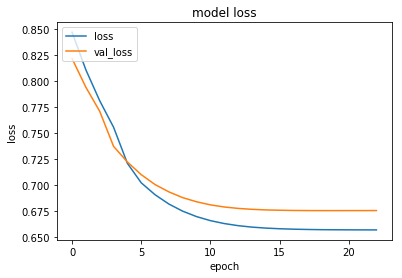

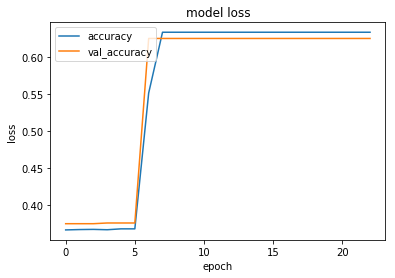

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 104us/step - loss: 1.2999 - acc: 0.6262 - val_loss: 1.0101 - val_acc: 0.6183
Epoch 2/50
4157/4157 [==============================] - 0s 92us/step - loss: 0.8451 - acc: 0.6322 - val_loss: 0.7294 - val_acc: 0.6192
Epoch 3/50
4157/4157 [==============================] - 0s 88us/step - loss: 0.6990 - acc: 0.6331 - val_loss: 0.6547 - val_acc: 0.6183
Epoch 4/50
4157/4157 [==============================] - 0s 93us/step - loss: 0.6855 - acc: 0.6334 - val_loss: 0.6488 - val_acc: 0.6192
Epoch 5/50
4157/4157 [==============================] - 0s 92us/step - loss: 0.6827 - acc: 0.6336 - val_loss: 0.6496 - val_acc: 0.6192
Epoch 6/50
4157/4157 [==============================] - 0s 93us/step - loss: 0.6815 - acc: 0.6339 - val_loss: 0.6519 - val_acc: 0.6212
Epoch 7/50
4157/4157 [==============================] - 0s 95us/step - loss: 0.6800 - acc: 0.6339 - val_loss: 

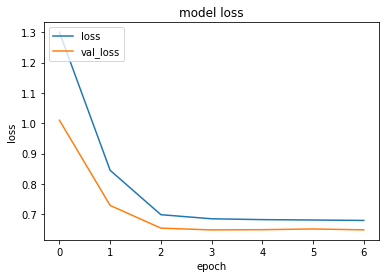

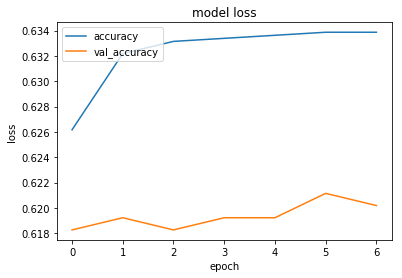

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 95us/step - loss: 1.6388 - acc: 0.6392 - val_loss: 1.4980 - val_acc: 0.6346
Epoch 2/50
4157/4157 [==============================] - 0s 96us/step - loss: 1.3675 - acc: 0.6404 - val_loss: 1.3672 - val_acc: 0.6337
Epoch 3/50
4157/4157 [==============================] - 0s 99us/step - loss: 1.2357 - acc: 0.6442 - val_loss: 1.2612 - val_acc: 0.6327
Epoch 4/50
4157/4157 [==============================] - 0s 97us/step - loss: 1.1595 - acc: 0.6428 - val_loss: 1.1939 - val_acc: 0.6279
Epoch 5/50
4157/4157 [==============================] - 0s 93us/step - loss: 1.0623 - acc: 0.6435 - val_loss: 1.0882 - val_acc: 0.6298
Epoch 6/50
4157/4157 [==============================] - 0s 96us/step - loss: 0.9926 - acc: 0.6430 - val_loss: 1.0226 - val_acc: 0.6288
Epoch 7/50
4157/4157 [==============================] - 0s 92us/step - loss: 0.9428 - acc: 0.6473 - val_loss: 0

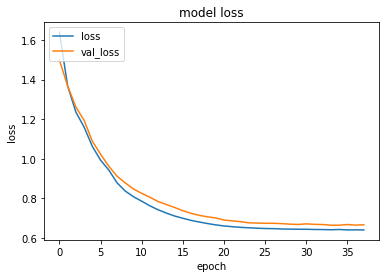

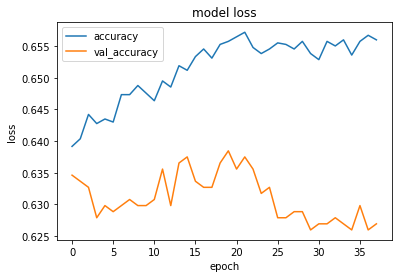

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 105us/step - loss: 2.2493 - acc: 0.6331 - val_loss: 2.0410 - val_acc: 0.6250
Epoch 2/50
4157/4157 [==============================] - 0s 105us/step - loss: 2.1002 - acc: 0.6331 - val_loss: 1.9639 - val_acc: 0.6250
Epoch 3/50
4157/4157 [==============================] - 0s 107us/step - loss: 2.0213 - acc: 0.6331 - val_loss: 1.9160 - val_acc: 0.6250
Epoch 4/50
4157/4157 [==============================] - 0s 107us/step - loss: 1.9616 - acc: 0.6331 - val_loss: 1.7991 - val_acc: 0.6250
Epoch 5/50
4157/4157 [==============================] - 0s 106us/step - loss: 1.8400 - acc: 0.6329 - val_loss: 1.6504 - val_acc: 0.6250
Epoch 6/50
4157/4157 [==============================] - 0s 105us/step - loss: 1.7869 - acc: 0.6331 - val_loss: 1.6153 - val_acc: 0.6250
Epoch 7/50
4157/4157 [==============================] - 0s 104us/step - loss: 1.7657 - acc: 0.6331 - val_

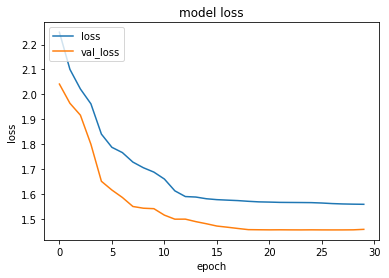

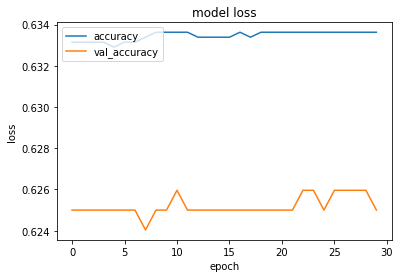

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 105us/step - loss: 2.1274 - acc: 0.5162 - val_loss: 1.7121 - val_acc: 0.5567
Epoch 2/50
4157/4157 [==============================] - 0s 109us/step - loss: 1.7658 - acc: 0.5057 - val_loss: 1.4352 - val_acc: 0.5519
Epoch 3/50
4157/4157 [==============================] - 0s 106us/step - loss: 1.4909 - acc: 0.4963 - val_loss: 1.2352 - val_acc: 0.5394
Epoch 4/50
4157/4157 [==============================] - 0s 110us/step - loss: 1.3040 - acc: 0.4982 - val_loss: 1.1139 - val_acc: 0.5452
Epoch 5/50
4157/4157 [==============================] - 0s 103us/step - loss: 1.1646 - acc: 0.5078 - val_loss: 0.9882 - val_acc: 0.5673
Epoch 6/50
4157/4157 [==============================] - 0s 108us/step - loss: 1.0378 - acc: 0.5266 - val_loss: 0.9156 - val_acc: 0.5663
Epoch 7/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.9589 - acc: 0.5384 - val_

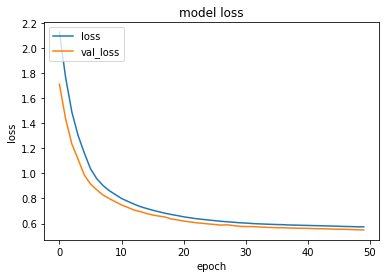

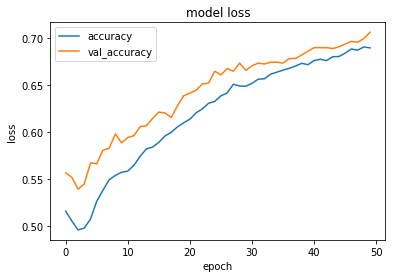

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 105us/step - loss: 1.2359 - acc: 0.6086 - val_loss: 1.1029 - val_acc: 0.6087
Epoch 2/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.8376 - acc: 0.6279 - val_loss: 0.9689 - val_acc: 0.6125
Epoch 3/50
4157/4157 [==============================] - 0s 103us/step - loss: 0.7775 - acc: 0.6295 - val_loss: 0.8953 - val_acc: 0.6154
Epoch 4/50
4157/4157 [==============================] - 0s 103us/step - loss: 0.7383 - acc: 0.6298 - val_loss: 0.8464 - val_acc: 0.6183
Epoch 5/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.7186 - acc: 0.6322 - val_loss: 0.8188 - val_acc: 0.6221
Epoch 6/50
4157/4157 [==============================] - 0s 102us/step - loss: 0.7105 - acc: 0.6317 - val_loss: 0.8075 - val_acc: 0.6212
Epoch 7/50
4157/4157 [==============================] - 0s 103us/step - loss: 0.7048 - acc: 0.6327 - val_

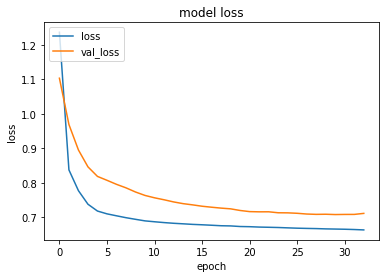

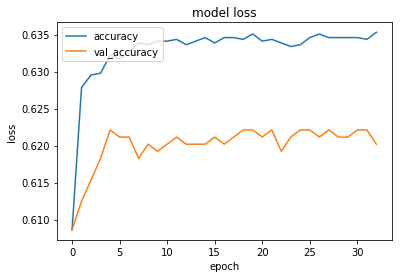

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 103us/step - loss: 2.3234 - acc: 0.6329 - val_loss: 2.1739 - val_acc: 0.6452
Epoch 2/50
4157/4157 [==============================] - 0s 104us/step - loss: 2.1136 - acc: 0.6351 - val_loss: 1.9695 - val_acc: 0.6442
Epoch 3/50
4157/4157 [==============================] - 0s 103us/step - loss: 1.9555 - acc: 0.6264 - val_loss: 1.8499 - val_acc: 0.6279
Epoch 4/50
4157/4157 [==============================] - 0s 105us/step - loss: 1.8550 - acc: 0.6331 - val_loss: 1.7824 - val_acc: 0.6471
Epoch 5/50
4157/4157 [==============================] - 0s 104us/step - loss: 1.7069 - acc: 0.6307 - val_loss: 1.7194 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 106us/step - loss: 1.6091 - acc: 0.6303 - val_loss: 1.4691 - val_acc: 0.6260
Epoch 7/50
4157/4157 [==============================] - 0s 103us/step - loss: 1.4773 - acc: 0.6271 - val_

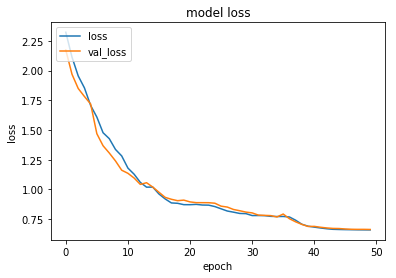

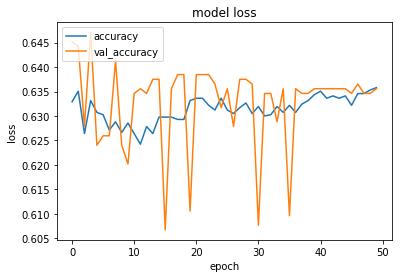

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 107us/step - loss: 1.9005 - acc: 0.3803 - val_loss: 1.7239 - val_acc: 0.3740
Epoch 2/50
4157/4157 [==============================] - 0s 103us/step - loss: 1.6558 - acc: 0.3782 - val_loss: 1.5621 - val_acc: 0.3788
Epoch 3/50
4157/4157 [==============================] - 0s 104us/step - loss: 1.5109 - acc: 0.3782 - val_loss: 1.4438 - val_acc: 0.3827
Epoch 4/50
4157/4157 [==============================] - 0s 103us/step - loss: 1.4015 - acc: 0.3765 - val_loss: 1.3577 - val_acc: 0.3962
Epoch 5/50
4157/4157 [==============================] - 0s 106us/step - loss: 1.3088 - acc: 0.3779 - val_loss: 1.2671 - val_acc: 0.3750
Epoch 6/50
4157/4157 [==============================] - 0s 105us/step - loss: 1.2343 - acc: 0.3854 - val_loss: 1.2039 - val_acc: 0.3750
Epoch 7/50
4157/4157 [==============================] - 0s 104us/step - loss: 1.1606 - acc: 0.3861 - val_

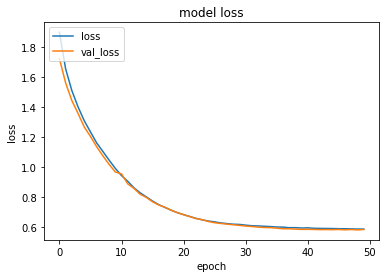

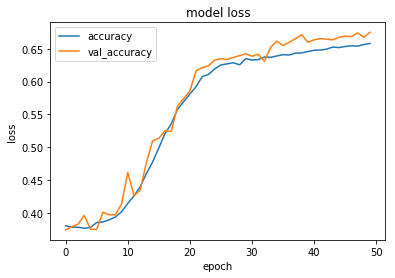

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 106us/step - loss: 2.6671 - acc: 0.3669 - val_loss: 2.4303 - val_acc: 0.3760
Epoch 2/50
4157/4157 [==============================] - 0s 104us/step - loss: 2.4315 - acc: 0.3669 - val_loss: 2.1740 - val_acc: 0.3760
Epoch 3/50
4157/4157 [==============================] - 0s 103us/step - loss: 2.1555 - acc: 0.3669 - val_loss: 1.9701 - val_acc: 0.3760
Epoch 4/50
4157/4157 [==============================] - 0s 104us/step - loss: 1.9644 - acc: 0.3669 - val_loss: 1.8626 - val_acc: 0.3760
Epoch 5/50
4157/4157 [==============================] - 0s 102us/step - loss: 1.8372 - acc: 0.3669 - val_loss: 1.7365 - val_acc: 0.3760
Epoch 6/50
4157/4157 [==============================] - 0s 104us/step - loss: 1.7137 - acc: 0.3669 - val_loss: 1.6195 - val_acc: 0.3760
Epoch 7/50
4157/4157 [==============================] - 0s 103us/step - loss: 1.5895 - acc: 0.3669 - val_

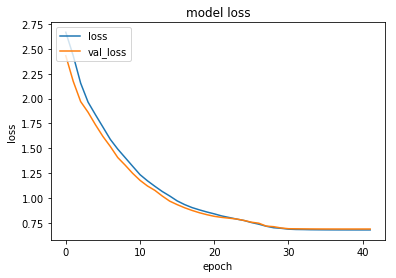

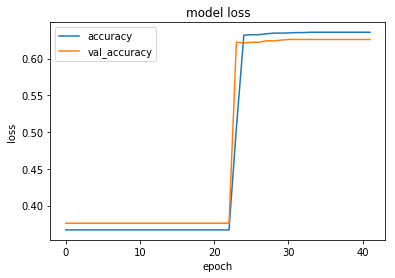

====================== 9 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 106us/step - loss: 2.9006 - acc: 0.6625 - val_loss: 2.7228 - val_acc: 0.6558
Epoch 2/50
4157/4157 [==============================] - 0s 104us/step - loss: 2.6615 - acc: 0.6659 - val_loss: 2.5905 - val_acc: 0.6558
Epoch 3/50
4157/4157 [==============================] - 0s 105us/step - loss: 2.5287 - acc: 0.6678 - val_loss: 2.3831 - val_acc: 0.6644
Epoch 4/50
4157/4157 [==============================] - 0s 104us/step - loss: 2.3452 - acc: 0.6724 - val_loss: 2.1510 - val_acc: 0.6702
Epoch 5/50
4157/4157 [==============================] - 0s 105us/step - loss: 2.1789 - acc: 0.6762 - val_loss: 2.0347 - val_acc: 0.6712
Epoch 6/50
4157/4157 [==============================] - 0s 85us/step - loss: 2.0399 - acc: 0.6772 - val_loss: 1.8765 - val_acc: 0.6731
Epoch 7/50
4157/4157 [==============================] - 0s 106us/step - loss: 1.9210 - acc: 0.6805 - val_l

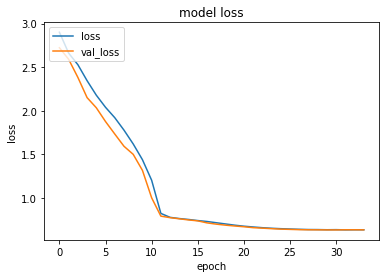

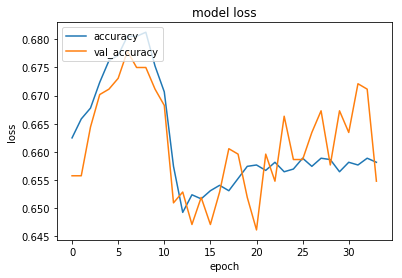

ES STEPS: 1  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 2  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 3  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 4  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 5  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 6  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 7  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 8  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 9  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 10  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 11  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 12  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 13  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 14  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 15  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 16  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 17  - BEST Loss: 0.6606  - BEST SCORE: 9.3648 
ES STEPS: 18  - BEST Loss: 0.6606  - BES

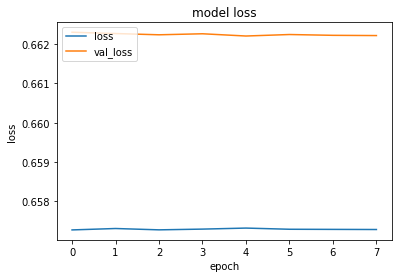

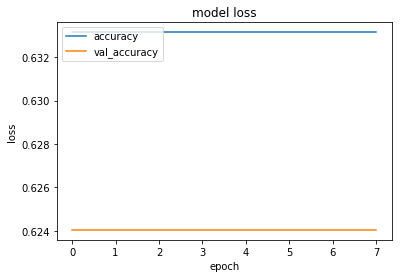

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6624 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 103us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6624 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 103us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6623 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6623 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6623 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 104us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6623 - val_acc: 0.6240
Epoch 7/50
4157/4157 [==============================] - 0s 104us/step - loss: 0.6573 - acc: 0.6331 - val_

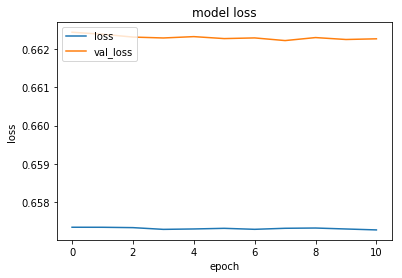

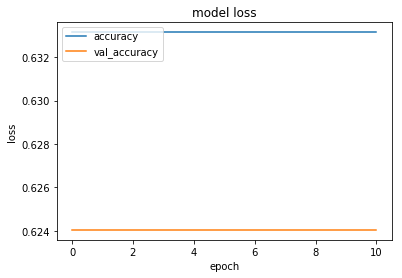

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6578 - acc: 0.6331 - val_loss: 0.6631 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6576 - acc: 0.6331 - val_loss: 0.6628 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6626 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6625 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6624 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 1s 125us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6623 - val_acc: 0.6240
Epoch 7/50
4157/4157 [==============================] - 0s 114us/step - loss: 0.6573 - acc: 0.6331 - val_

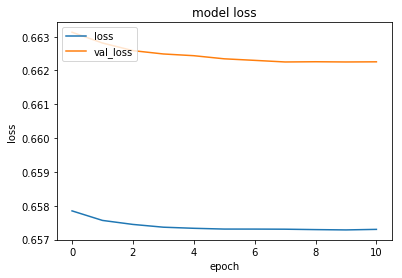

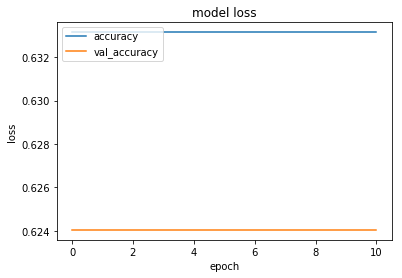

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 111us/step - loss: 0.6579 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 109us/step - loss: 0.6576 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 108us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Restoring model weights from the end of the best epoch
Epoch 00005: early stopping


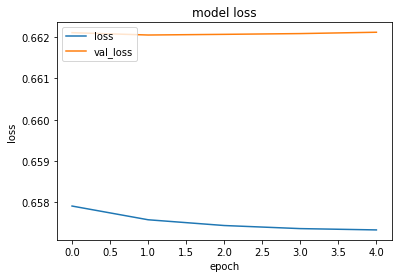

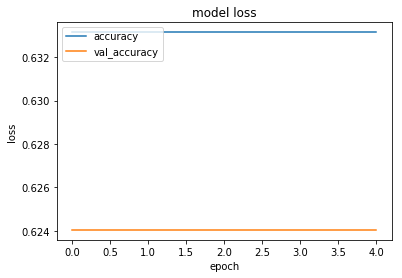

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 103us/step - loss: 0.6582 - acc: 0.6331 - val_loss: 0.6632 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6592 - acc: 0.6331 - val_loss: 0.6629 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 109us/step - loss: 0.6580 - acc: 0.6331 - val_loss: 0.6626 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 109us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6624 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6623 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 109us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6623 - val_acc: 0.6240
Epoch 7/50
4157/4157 [==============================] - 0s 83us/step - loss: 0.6573 - acc: 0.6331 - val_l

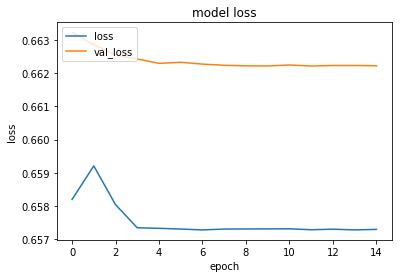

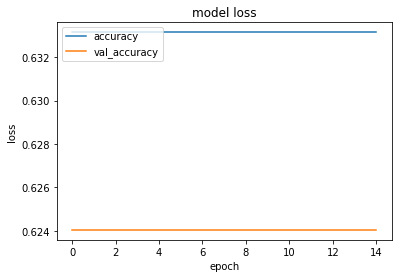

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 104us/step - loss: 0.6581 - acc: 0.6331 - val_loss: 0.6622 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 109us/step - loss: 0.6577 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6575 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 108us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Restoring model weights from the end of the best epoch
Epoch 00006: early stopping


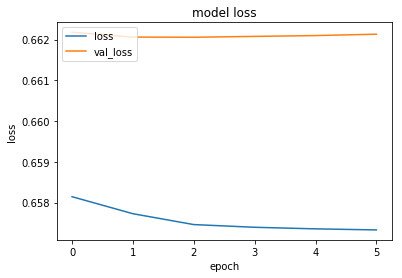

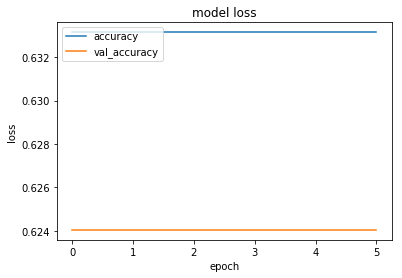

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 103us/step - loss: 0.6584 - acc: 0.6331 - val_loss: 0.6637 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 104us/step - loss: 0.6578 - acc: 0.6331 - val_loss: 0.6632 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6575 - acc: 0.6331 - val_loss: 0.6627 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 103us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6626 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6624 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 104us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6624 - val_acc: 0.6240
Epoch 7/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6573 - acc: 0.6331 - val_

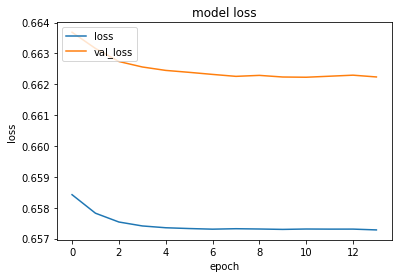

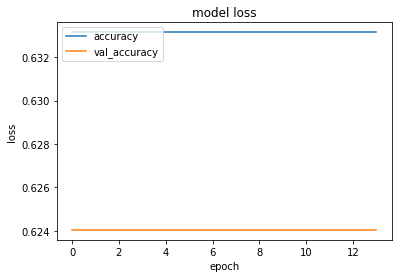

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6585 - acc: 0.6331 - val_loss: 0.6638 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 108us/step - loss: 0.6579 - acc: 0.6331 - val_loss: 0.6632 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 109us/step - loss: 0.6576 - acc: 0.6331 - val_loss: 0.6628 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6626 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 112us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6624 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 109us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6623 - val_acc: 0.6240
Epoch 7/50
4157/4157 [==============================] - 0s 111us/step - loss: 0.6573 - acc: 0.6331 - val_

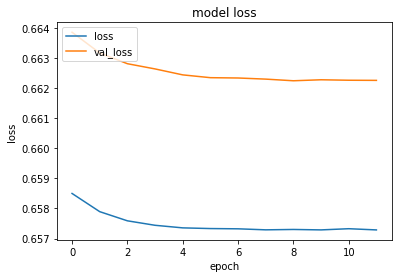

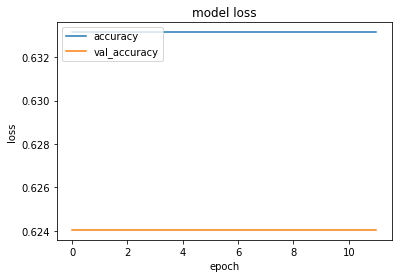

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 108us/step - loss: 0.6588 - acc: 0.6331 - val_loss: 0.6624 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 108us/step - loss: 0.6580 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6577 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6575 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 104us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 7/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6573 - acc: 0.6331 - val_

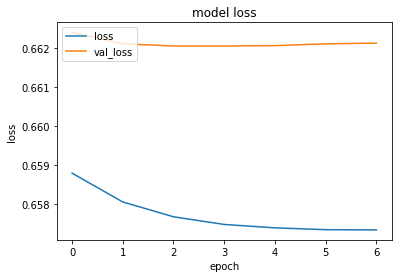

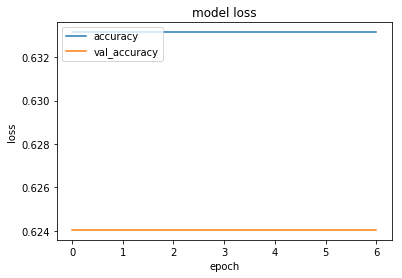

====================== 9 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 102us/step - loss: 0.6602 - acc: 0.6331 - val_loss: 0.6658 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 109us/step - loss: 0.6586 - acc: 0.6331 - val_loss: 0.6642 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6577 - acc: 0.6331 - val_loss: 0.6634 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6630 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6571 - acc: 0.6331 - val_loss: 0.6627 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6570 - acc: 0.6331 - val_loss: 0.6625 - val_acc: 0.6240
Epoch 7/50
4157/4157 [==============================] - 0s 104us/step - loss: 0.6569 - acc: 0.6331 - val_

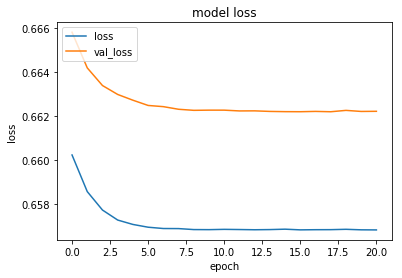

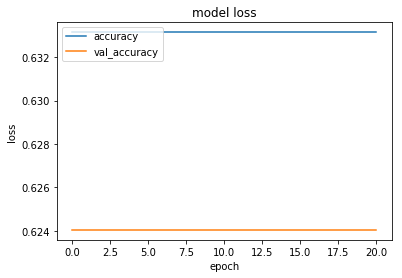

ES STEPS: 1  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 2  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 3  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 4  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 5  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 6  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 7  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 8  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 9  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 10  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 11  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 12  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 13  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 14  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 15  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 16  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 17  - BEST Loss: 0.6331  - BEST SCORE: 9.3432 
ES STEPS: 18  - BEST Loss: 0.6331  - BES

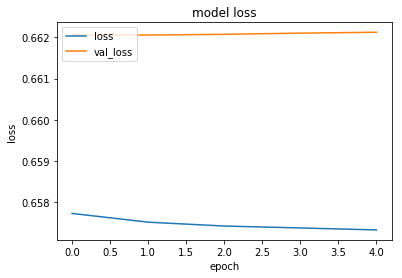

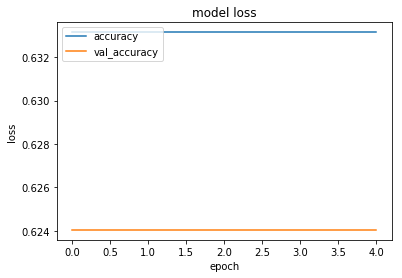

====================== 1 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6578 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 108us/step - loss: 0.6576 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 111us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Restoring model weights from the end of the best epoch
Epoch 00005: early stopping


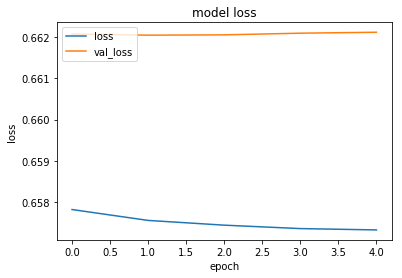

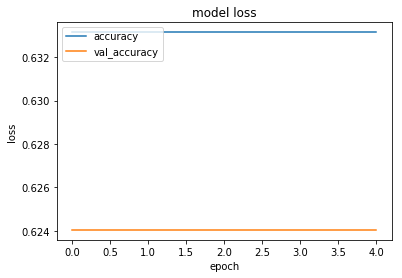

====================== 2 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6580 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6576 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 113us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 112us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 110us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Restoring model weights from the end of the best epoch
Epoch 00005: early stopping


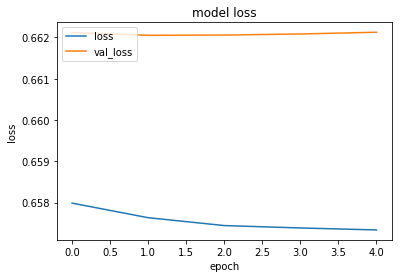

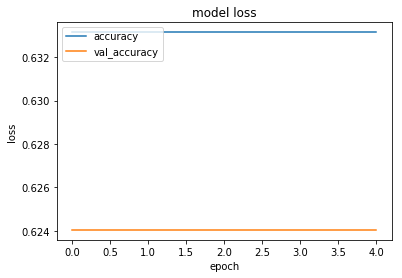

====================== 3 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 109us/step - loss: 0.6581 - acc: 0.6331 - val_loss: 0.6634 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 114us/step - loss: 0.6576 - acc: 0.6331 - val_loss: 0.6629 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6575 - acc: 0.6331 - val_loss: 0.6627 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 108us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6625 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 110us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6624 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 109us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6623 - val_acc: 0.6240
Epoch 7/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6573 - acc: 0.6331 - val_

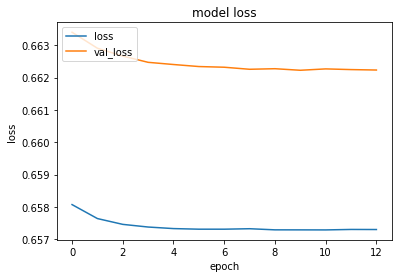

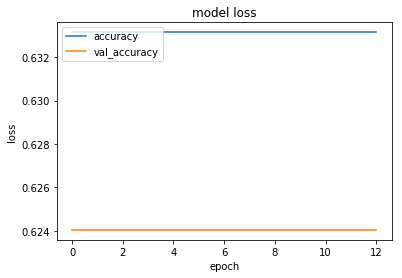

====================== 4 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 113us/step - loss: 0.6586 - acc: 0.6331 - val_loss: 0.6639 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6580 - acc: 0.6331 - val_loss: 0.6633 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6576 - acc: 0.6331 - val_loss: 0.6629 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 104us/step - loss: 0.6575 - acc: 0.6331 - val_loss: 0.6626 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6624 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6624 - val_acc: 0.6240
Epoch 7/50
4157/4157 [==============================] - 0s 104us/step - loss: 0.6573 - acc: 0.6331 - val_

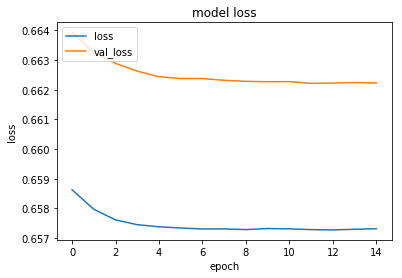

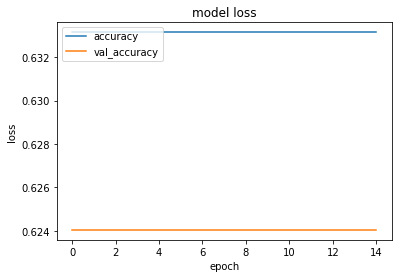

====================== 5 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6587 - acc: 0.6331 - val_loss: 0.6623 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6580 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6576 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6575 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 103us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Restoring model weights from the end of the best epoch
Epoch 00006: early stopping


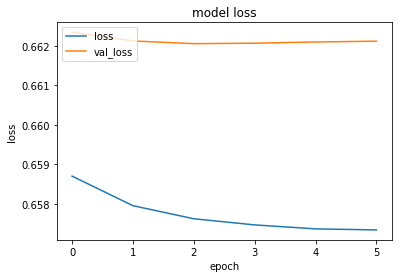

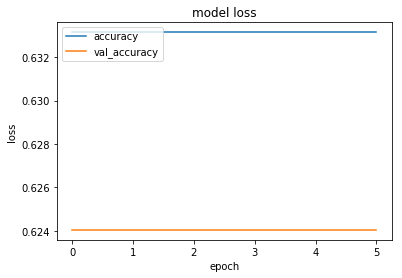

====================== 6 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6587 - acc: 0.6331 - val_loss: 0.6624 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6579 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6576 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6573 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Restoring model weights from the end of the best epoch
Epoch 00006: early stopping


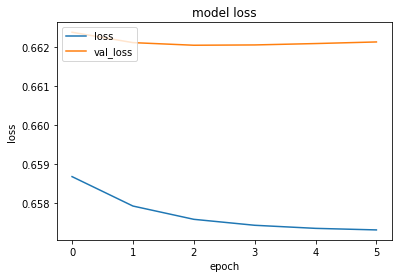

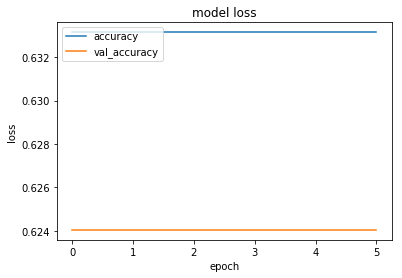

====================== 7 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 108us/step - loss: 0.6601 - acc: 0.6331 - val_loss: 0.6629 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6586 - acc: 0.6331 - val_loss: 0.6623 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 104us/step - loss: 0.6579 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6576 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 104us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 7/50
4157/4157 [==============================] - 0s 109us/step - loss: 0.6573 - acc: 0.6331 - val_

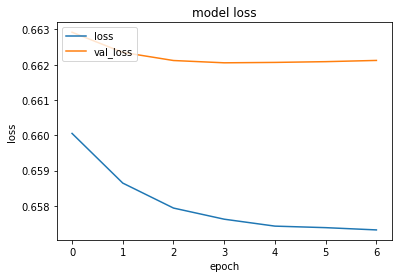

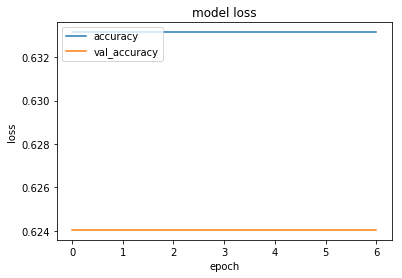

====================== 8 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 109us/step - loss: 0.6614 - acc: 0.6331 - val_loss: 0.6637 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6593 - acc: 0.6331 - val_loss: 0.6626 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 104us/step - loss: 0.6583 - acc: 0.6331 - val_loss: 0.6622 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6578 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6575 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6574 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 7/50
4157/4157 [==============================] - 0s 105us/step - loss: 0.6573 - acc: 0.6331 - val_

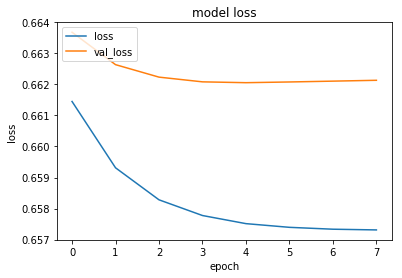

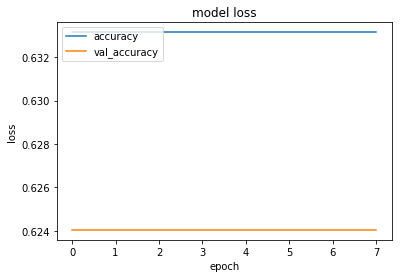

====================== 9 of 10
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 108us/step - loss: 0.6627 - acc: 0.6331 - val_loss: 0.6643 - val_acc: 0.6240
Epoch 2/50
4157/4157 [==============================] - 0s 103us/step - loss: 0.6600 - acc: 0.6331 - val_loss: 0.6630 - val_acc: 0.6240
Epoch 3/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6587 - acc: 0.6331 - val_loss: 0.6624 - val_acc: 0.6240
Epoch 4/50
4157/4157 [==============================] - 0s 106us/step - loss: 0.6580 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 5/50
4157/4157 [==============================] - 0s 102us/step - loss: 0.6577 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 6/50
4157/4157 [==============================] - 0s 101us/step - loss: 0.6575 - acc: 0.6331 - val_loss: 0.6621 - val_acc: 0.6240
Epoch 7/50
4157/4157 [==============================] - 0s 107us/step - loss: 0.6574 - acc: 0.6331 - val_

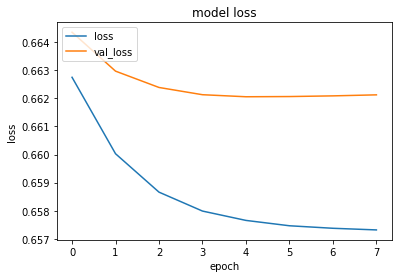

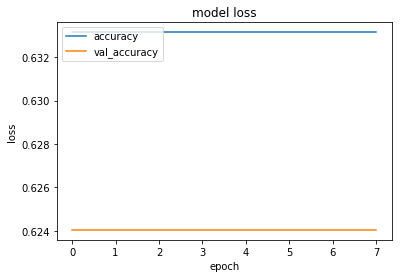

ES STEPS: 1  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 2  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 3  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 4  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 5  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 6  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 7  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 8  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 9  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 10  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 11  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 12  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 13  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 14  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 15  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 16  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 17  - BEST Loss: 0.6331  - BEST SCORE: 9.3427 
ES STEPS: 18  - BEST Loss: 0.6331  - BES

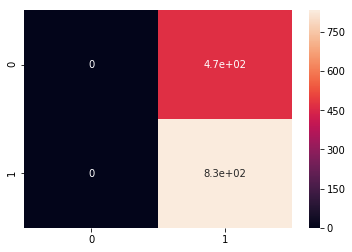

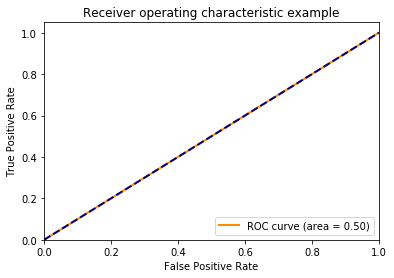

In [17]:
# Initialize
model = ModelCompile()
weights = model.get_weights() 
MyES = ES(model, X_train, y_train, InitialSigma = 0.1, ParentsSize = 15, ChildSize = 100, tao = 0.5)   
weights, ES_Optimized_ObjVal, P_Best10_Weights, P_Best10_Sigma  = MyES.run(weights, useOLSReg =False, max_steps=3, verbose = 1)

# Optimize
GlobalBestAccuracy = 0
NoImproveTimes = 0
while True:
  # Gradient-based Optimize
  for i, i_Weights in enumerate(P_Best10_Weights): 
      print('======================', i, 'of', len(P_Best10_Weights))  
      i_Weights = P_Best10_Weights[i]
      temp_flatten_weight = MyES._UnflattenWeights(WeightsStrucure = MyES.WeightsStrucure, ModifiedWeights = i_Weights)
      model, weights = ModelFit(model=model, weights=temp_flatten_weight, epochs=50)
      _, temp_unflatten_weight = MyES._FlattenWeights(weights) 
      P_Best10_Weights[i] = np.array(temp_unflatten_weight) 
  # ES
  weights, ES_Optimized_ObjVal, P_Best10_Weights, P_Best10_Sigma = MyES.run(weights, max_steps=20, verbose = 1,
                                                                            Population_Parents_Weights=P_Best10_Weights, 
                                                                            Population_Parents_Sigma=P_Best10_Sigma)
  # Stop Criteria
  if ES_Optimized_ObjVal > GlobalBestAccuracy:
    GlobalBestAccuracy = ES_Optimized_ObjVal
    NoImproveTimes = 0
  else: 
    NoImproveTimes = NoImproveTimes + 1
    if NoImproveTimes == 2:
      break
    
Performance(model)